# End-to-End EDA: Stock, Macro, and Sentiment Data

This notebook performs an exploratory data analysis (EDA) for stock price prediction using historical stock prices, macroeconomic indicators, and financial news sentiment data. The workflow includes data cleaning, visualization, and merging of datasets for deeper insights.

## 1. Import Required Libraries

We begin by importing the necessary libraries for data analysis and visualization.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better plot aesthetics
plt.style.use('seaborn-v0_8-darkgrid')
import warnings
warnings.filterwarnings('ignore')

## 2. Load Datasets

Load the following CSV files into pandas DataFrames:
- `all_stocks_5y_data.csv`: Historical stock prices
- `macro_data.csv`: Macroeconomic indicators
- `stock_news_sentiment.csv`: Financial news sentiment

In [60]:
# File paths (update if needed)
stock_fp = '../data/raw/all_stocks_5y_data.csv'
macro_fp = '../data/raw/macro_data.csv'
sentiment_fp = '../data/raw/historical_stock_news_sentiment_5years.csv'

# Load datasets
stocks_df = pd.read_csv(stock_fp)
macro_df = pd.read_csv(macro_fp)
sentiment_df = pd.read_csv(sentiment_fp)

print("Stock data shape:", stocks_df.shape)
print("Macro data shape:", macro_df.shape)
print("Sentiment data shape:", sentiment_df.shape)

Stock data shape: (66568, 9)
Macro data shape: (1578, 34)
Sentiment data shape: (214, 5)


## 3. Convert Date Columns to Datetime

Convert the `date` column in all datasets to pandas datetime format for proper time-based analysis.

In [61]:
# Convert 'date' columns to datetime
stocks_df['date'] = pd.to_datetime(stocks_df['Date'])
macro_df['date'] = pd.to_datetime(macro_df['Date'])
sentiment_df['date'] = pd.to_datetime(sentiment_df['Date'])

# Check conversion
print(stocks_df['date'].dtype, macro_df['date'].dtype, sentiment_df['date'].dtype)

object datetime64[ns] datetime64[ns]


## 4. Handle Missing Values

- Forward-fill missing sentiment scores per `ticker` in `stock_news_sentiment.csv`.
- If the first score for a ticker is missing, fill it with 0.
- Handle other missing values as needed.

In [62]:
# Forward-fill sentiment scores per ticker, fill initial NaNs with 0
sentiment_df = sentiment_df.sort_values(['Ticker', 'Date'])
sentiment_df['Sentiment_Score'] = (
    sentiment_df.groupby('Ticker')['Sentiment_Score']
    .transform(lambda x: x.ffill().fillna(0))
)

# Check for remaining missing values
print("Missing sentiment scores:", sentiment_df['Sentiment_Score'].isna().sum())

# Check missing values in other datasets
print("Stocks missing values:\n", stocks_df.isna().sum())
print("Macro missing values:\n", macro_df.isna().sum())

Missing sentiment scores: 0
Stocks missing values:
 Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Symbol          0
date            0
dtype: int64
Macro missing values:
 Date                            0
Fed_Funds_Rate                  5
US_10Y_Treasury                 5
US_3M_Treasury                  5
US_2Y_Treasury                  5
CPI_All_Items                   5
Core_CPI                        5
PCE_Price_Index                 5
Core_PCE                        5
GDP_Real                        5
Industrial_Production           5
Capacity_Utilization            5
Unemployment_Rate               5
Nonfarm_Payrolls                5
Labor_Force_Participation       5
Initial_Claims                  2
Continuing_Claims               2
Retail_Sales                    5
Consumer_Confidence             5
Personal_Income                 5
Personal_Spending               5
Personal_Saving_Ra

## 5. EDA on Stock Data

- Display basic info (shape, columns, missing values).
- Plot distribution of closing prices.
- Time-series plots for `close` prices of selected tickers (AAPL, MSFT, AMZN).
- Top 10 tickers by average trading volume.
- Correlation heatmap for `open`, `high`, `low`, `close`, and `volume`.

Stocks DataFrame shape: (66568, 10)
Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Symbol', 'date']
Missing values:
 Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Symbol          0
date            0
dtype: int64


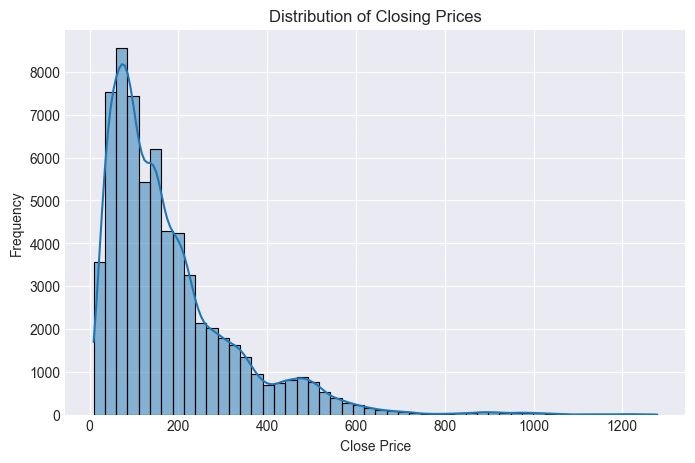

In [63]:
# Basic info
print("Stocks DataFrame shape:", stocks_df.shape)
print("Columns:", stocks_df.columns.tolist())
print("Missing values:\n", stocks_df.isna().sum())

# Distribution of closing prices
plt.figure(figsize=(8,5))
sns.histplot(stocks_df['Close'], bins=50, kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

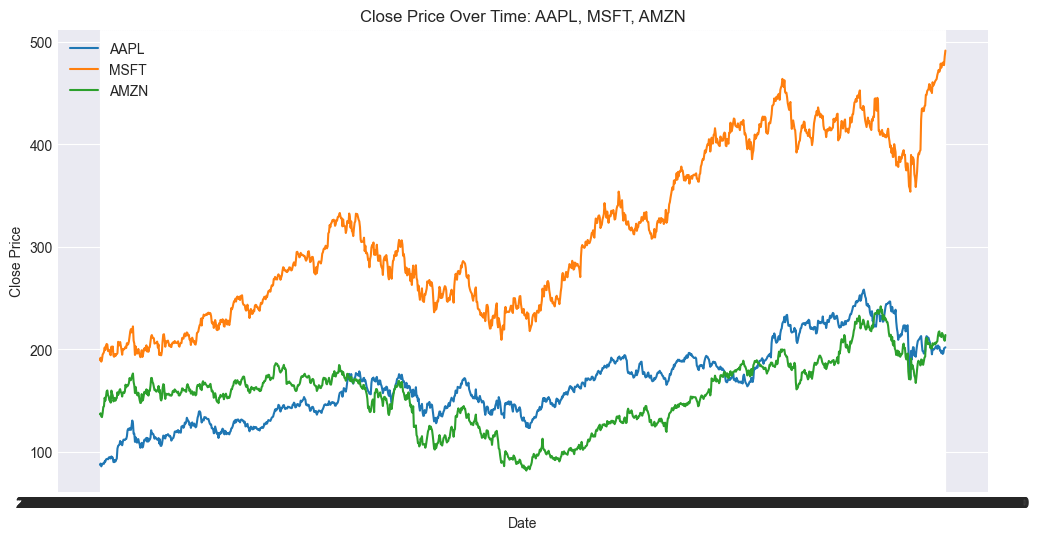

In [64]:
# Time-series plot for selected tickers
selected_tickers = ['AAPL', 'MSFT', 'AMZN']
plt.figure(figsize=(12,6))
for ticker in selected_tickers:
    ticker_df = stocks_df[stocks_df['Symbol'] == ticker]
    plt.plot(ticker_df['Date'], ticker_df['Close'], label=ticker)
plt.title('Close Price Over Time: AAPL, MSFT, AMZN')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

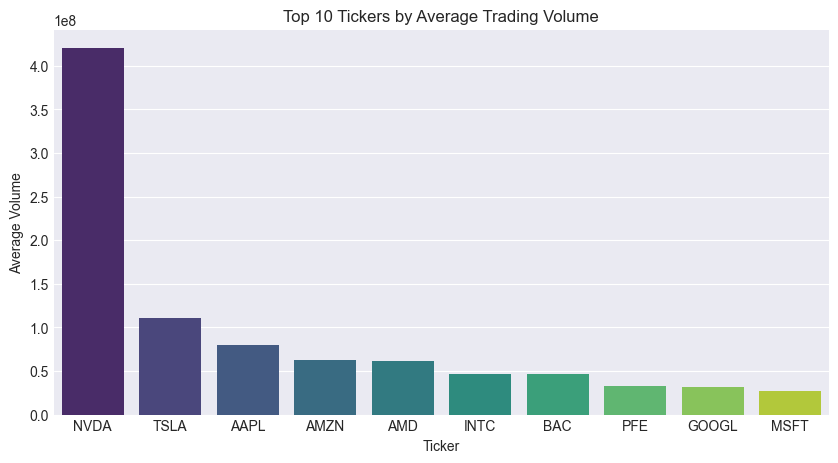

In [65]:
# Top 10 tickers by average trading volume
top_vol = (
    stocks_df.groupby('Symbol')['Volume']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
plt.figure(figsize=(10,5))
sns.barplot(x=top_vol.index, y=top_vol.values, palette='viridis')
plt.title('Top 10 Tickers by Average Trading Volume')
plt.xlabel('Ticker')
plt.ylabel('Average Volume')
plt.show()

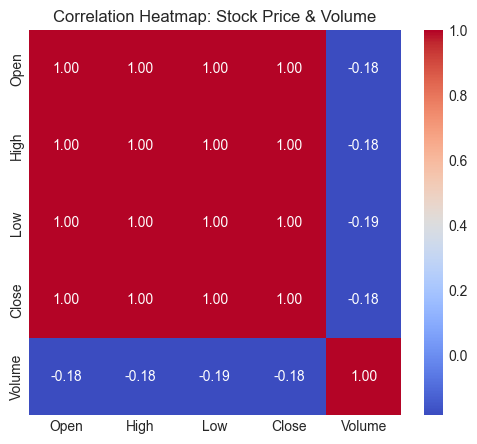

In [66]:
# Correlation heatmap for price and volume columns
corr_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
corr = stocks_df[corr_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Stock Price & Volume')
plt.show()

## 6. EDA on Macroeconomic Data

- Line plots for `GDP`, `CPI`, `unemployment`, and `interest_rate` over time.
- Correlation matrix of all macro indicators.
- Highlight trends or anomalies (e.g., inflation spikes).

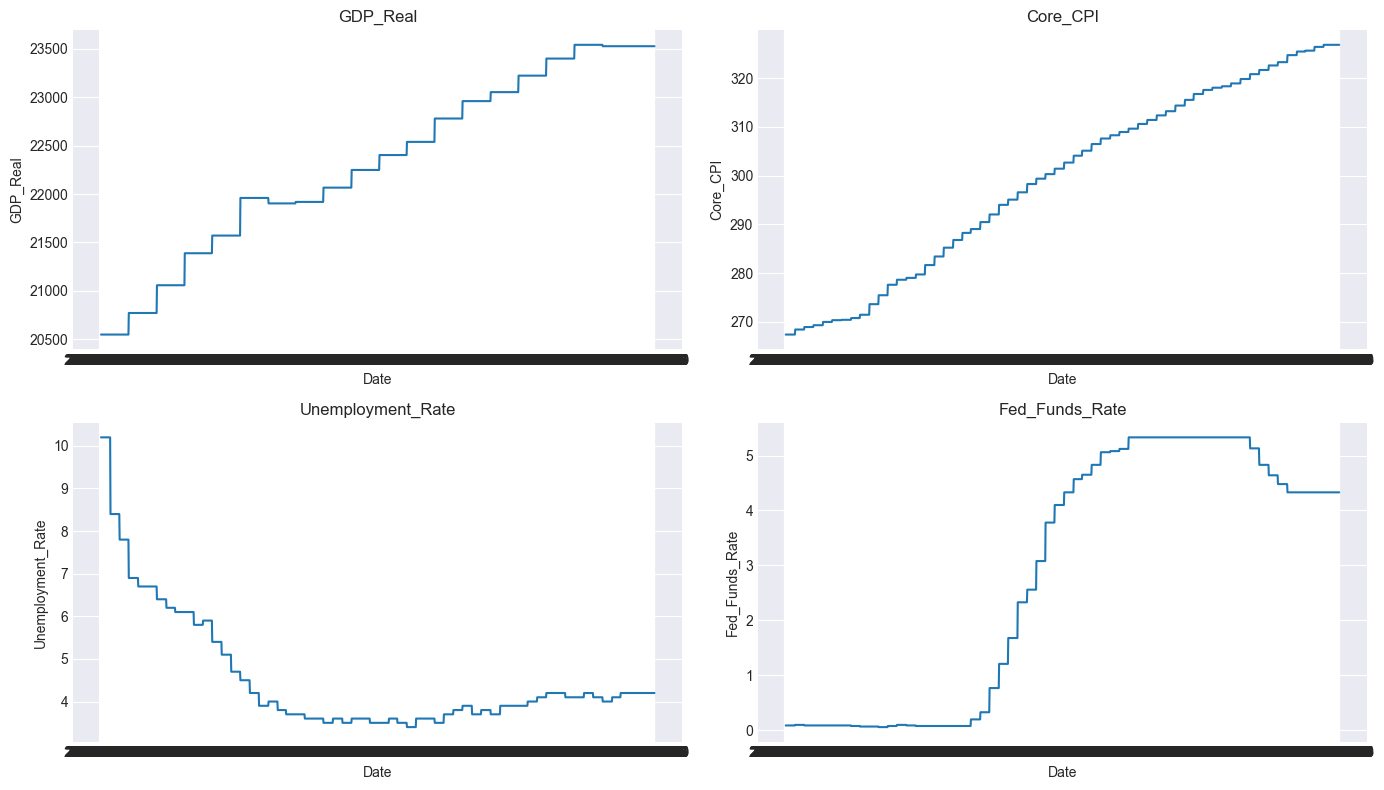

In [67]:
# Line plots for macro indicators
macro_cols = ['GDP_Real', 'Core_CPI', 'Unemployment_Rate', 'Fed_Funds_Rate']
plt.figure(figsize=(14,8))
for i, col in enumerate(macro_cols, 1):
    plt.subplot(2,2,i)
    plt.plot(macro_df['Date'], macro_df[col])
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

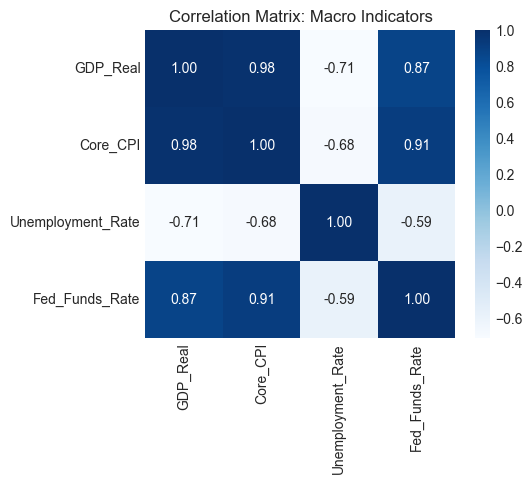

In [68]:
# Correlation matrix of macro indicators
macro_corr = macro_df[macro_cols].corr()
plt.figure(figsize=(5,4))
sns.heatmap(macro_corr, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix: Macro Indicators')
plt.show()

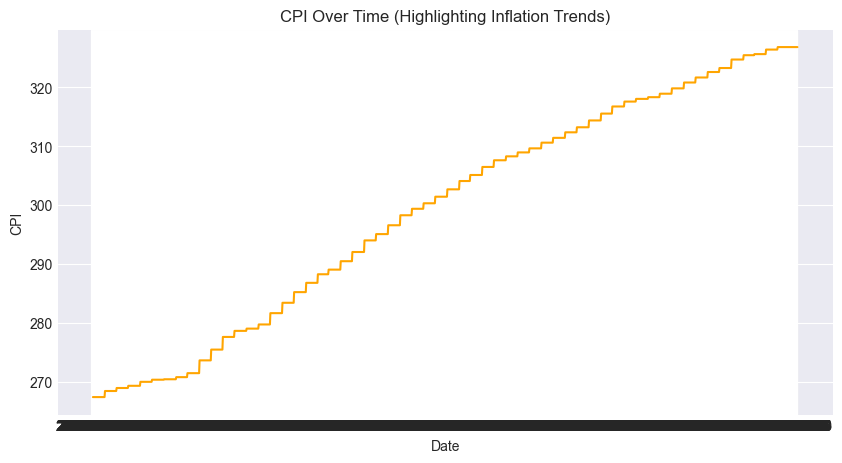

In [69]:
# Highlighting inflation (CPI) spikes
plt.figure(figsize=(10,5))
plt.plot(macro_df['Date'], macro_df['Core_CPI'], color='orange')
plt.title('CPI Over Time (Highlighting Inflation Trends)')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.show()

## 7. EDA on Sentiment Data

- Number of sentiment entries per ticker.
- Line plot of average daily sentiment across all tickers.
- Sentiment score distribution (histogram).
- Analyze if certain tickers are consistently positive or negative after forward-filling.

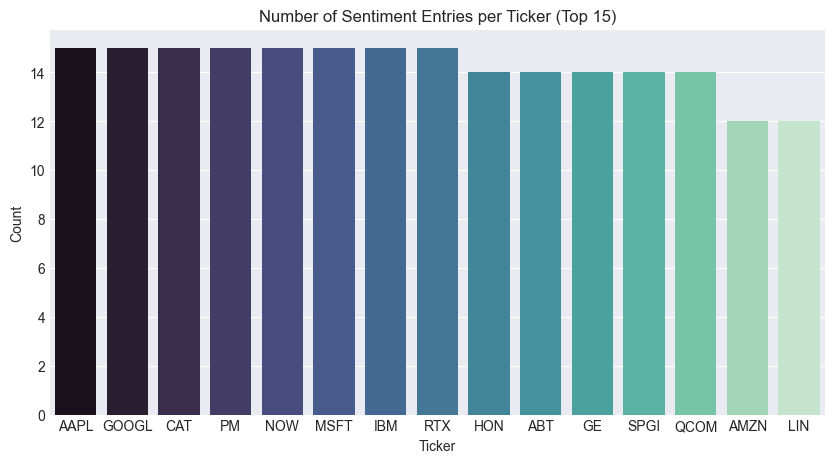

In [70]:
# Number of sentiment entries per ticker
sentiment_counts = sentiment_df['Ticker'].value_counts().head(15)
plt.figure(figsize=(10,5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='mako')
plt.title('Number of Sentiment Entries per Ticker (Top 15)')
plt.xlabel('Ticker')
plt.ylabel('Count')
plt.show()

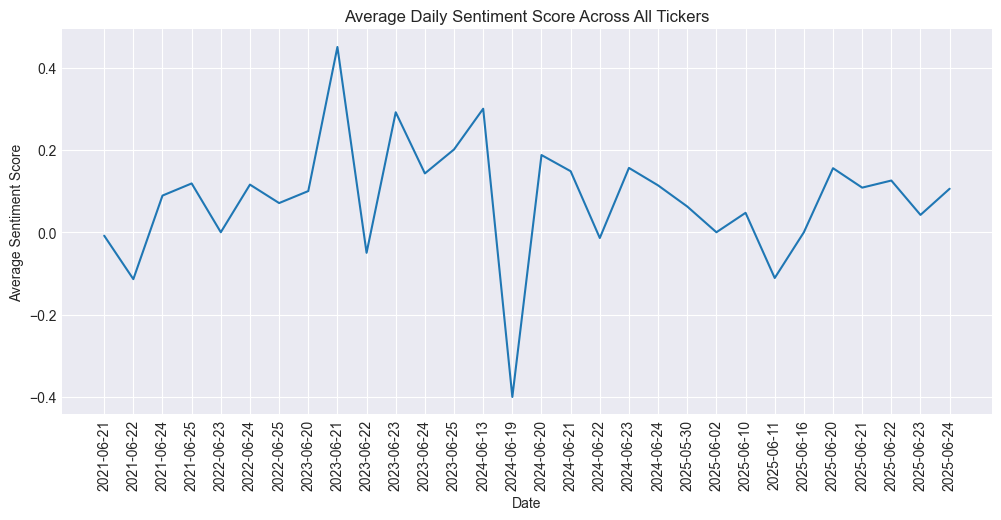

In [71]:
# Line plot of average daily sentiment across all tickers
daily_sentiment = sentiment_df.groupby('Date')['Sentiment_Score'].mean()
plt.figure(figsize=(12,5))
plt.plot(daily_sentiment.index, daily_sentiment.values)
plt.title('Average Daily Sentiment Score Across All Tickers')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Average Sentiment Score')
plt.show()

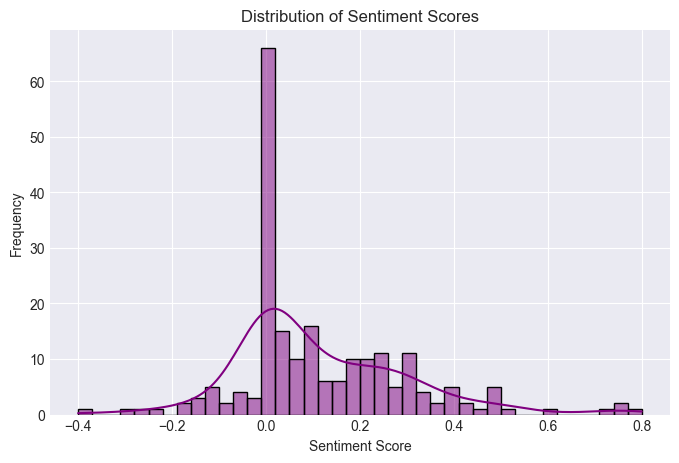

In [72]:
# Sentiment score distribution
plt.figure(figsize=(8,5))
sns.histplot(sentiment_df['Sentiment_Score'], bins=40, kde=True, color='purple')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [73]:
# Analyze consistently positive/negative tickers after forward-filling
ticker_sentiment_mean = sentiment_df.groupby('Ticker')['Sentiment_Score'].mean().sort_values()
print("Top 5 consistently negative tickers:\n", ticker_sentiment_mean.head(5))
print("\nTop 5 consistently positive tickers:\n", ticker_sentiment_mean.tail(5))

Top 5 consistently negative tickers:
 Ticker
GOOGL    0.035360
ABT      0.069843
AAPL     0.072200
SPGI     0.078493
LIN      0.098683
Name: Sentiment_Score, dtype: float64

Top 5 consistently positive tickers:
 Ticker
RTX     0.125513
MSFT    0.162420
QCOM    0.168386
AMZN    0.194858
PM      0.206973
Name: Sentiment_Score, dtype: float64


## 8. Cleaned Datasets

Join stock data with sentiment and macro data on `date` (and `ticker` where applicable) to create a combined DataFrame for further analysis.

In [74]:
# Handle missing values in macro data and keep only selected columns

# Select relevant columns (adjust names if needed)
macro_selected = macro_df[['Date', 'GDP_Real', 'Fed_Funds_Rate', 'Core_CPI', 'Unemployment_Rate']].copy()

# Rename columns for clarity
macro_selected = macro_selected.rename(columns={
    'GDP_Real': 'GDP',
    'Fed_Funds_Rate': 'Fed_Funds_Rate',
    'Core_CPI': 'Inflation',
    'Unemployment_Rate': 'Unemployment_Rate'
})

# Handle missing values (forward fill, then back fill as fallback)
macro_selected = macro_selected.sort_values('Date')
macro_selected = macro_selected.fillna(method='ffill').fillna(method='bfill')

# Save cleaned macro data to processed folder
macro_selected.to_csv('../data/processed/macro_data_cleaned.csv', index=False)

print("Cleaned macro data saved to ../data/processed/macro_data_cleaned.csv")

Cleaned macro data saved to ../data/processed/macro_data_cleaned.csv


In [85]:
# Handle missing values in stock data and keep only selected columns

# Select relevant columns (adjust names if needed)
stock_selected = stocks_df[['Date', 'Symbol', 'Open', 'High', 'Low', 'Close']].copy()

# Handle missing values (forward fill, then back fill as fallback)
stock_selected = stock_selected.sort_values('Date')
stock_selected = stock_selected.fillna(method='ffill').fillna(method='bfill')

# Save cleaned macro data to processed folder
stock_selected.to_csv('../data/processed/stock_data_cleaned.csv', index=False)

print("Cleaned sentiment data saved to ../data/processed/stock_data_cleaned.csv")

Cleaned sentiment data saved to ../data/processed/stock_data_cleaned.csv


In [84]:
# Handle missing values in sentiment data and keep only selected columns

# Select relevant columns (adjust names if needed)
sentiment_selected = sentiment_df[['Date', 'Ticker', 'Tone', 'Sentiment_Score']].copy()

# Handle missing values (forward fill, then back fill as fallback)
sentiment_selected = sentiment_selected.sort_values('Date')
sentiment_selected = sentiment_selected.fillna(method='ffill').fillna(method='bfill')

# Save cleaned macro data to processed folder
sentiment_selected.to_csv('../data/processed/sentiment_data_cleaned.csv', index=False)

print("Cleaned sentiment data saved to ../data/processed/sentiment_data_cleaned.csv")

Cleaned sentiment data saved to ../data/processed/sentiment_data_cleaned.csv


In [96]:
print(stocks_df.dtypes)

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
Symbol           object
date             object
dtype: object


In [97]:
print(macro_df.dtypes)

Date                 datetime64[ns]
GDP                         float64
Fed_Funds_Rate              float64
Inflation                   float64
Unemployment_Rate           float64
dtype: object


In [103]:
stock_df['Date'] = pd.to_datetime(stock_df['Date'], errors='coerce', inplace=True)
print(stock_df['Date'].dtype)

TypeError: to_datetime() got an unexpected keyword argument 'inplace'

In [101]:
# Ensure 'Date' columns are all datetime type before merging

stock_df = pd.read_csv('../data/processed/stock_data_cleaned.csv')
macro_df = pd.read_csv('../data/processed/macro_data_cleaned.csv')
sentiment_df = pd.read_csv('../data/processed/sentiment_data_cleaned.csv')

# Convert 'Date' columns to datetime (force conversion)
#stock_df['Date'] = pd.to_datetime(stock_df['Date'], errors='coerce')
macro_df['Date'] = pd.to_datetime(macro_df['Date'], errors='coerce')
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'], errors='coerce')

# Merge stock and macro data on 'Date' (left join)
merged_df = pd.merge(stock_df, macro_df, on='Date', how='left', suffixes=('_stock', '_macro'))

# Merge with sentiment data on 'Date' and 'Ticker' (left join)
if 'Symbol' in sentiment_df.columns:
    merged_df = pd.merge(merged_df, sentiment_df, on=['Date', 'Symbol'], how='left')
else:
    merged_df = pd.merge(merged_df, sentiment_df, on='Date', how='left')

# Save merged data
output_path = '../data/processed/dataset.csv'
merged_df.to_csv(output_path, index=False)
print(f"Merged dataset saved to {output_path}")

ValueError: You are trying to merge on object and datetime64[ns] columns for key 'Date'. If you wish to proceed you should use pd.concat